# Pytorch and Tensorflow

<br> We first import Pytorch and TensorFlow.</br>
In the case that there are no packages please visit
<ul>
    <li> For <b> TensorFlow </b>, visit   <a href = https://www.tensorflow.org/install/>tensorflow.org/install</a>    </li>
    <li>  For <b> Pytorch </b>, visit   <a href =https://pytorch.org/get-started/locally/> pytorch.org/get-started/locally</a>    </li> </li>
</ul>
Make sure that <b>pip</b> is properly install in your environment


In [2]:
import torch 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Define Tensors or converting from numpy arrays
In computational programing, tensor is nothing other multi-dimensional arrays. </br>
Unlike in Physics, which we need to much more care about the transformation properties.</br>
Both Pytorch and TensorFlow can change numpy type quantity to tensor quantity.


In [118]:
X = np.random.rand(4,4)
print("numpy array is given as follows ")
print(X,type(X))
X_tensorflow = tf.convert_to_tensor(X)
print("\n We can convert into tensor rank-n in ternsorflow: ")
print(X_tensorflow,type(X_tensorflow))
X_pytorch = torch.from_numpy(X)
print("\n We can convert into tensor rank-n in ternsorflow: ")

print(X_pytorch,type(X_pytorch))



numpy array is given as follows 
[[0.23951971 0.46147239 0.78459481 0.57903601]
 [0.33148967 0.96051163 0.59041406 0.79837633]
 [0.96641596 0.4051617  0.46419597 0.90321574]
 [0.53491057 0.73742794 0.16439057 0.09105809]] <class 'numpy.ndarray'>

 We can convert into tensor rank-n in ternsorflow: 
tf.Tensor(
[[0.23951971 0.46147239 0.78459481 0.57903601]
 [0.33148967 0.96051163 0.59041406 0.79837633]
 [0.96641596 0.4051617  0.46419597 0.90321574]
 [0.53491057 0.73742794 0.16439057 0.09105809]], shape=(4, 4), dtype=float64) <class 'tensorflow.python.framework.ops.EagerTensor'>

 We can convert into tensor rank-n in ternsorflow: 
tensor([[0.2395, 0.4615, 0.7846, 0.5790],
        [0.3315, 0.9605, 0.5904, 0.7984],
        [0.9664, 0.4052, 0.4642, 0.9032],
        [0.5349, 0.7374, 0.1644, 0.0911]], dtype=torch.float64) <class 'torch.Tensor'>


### Regression

In this section, I will first manually construct the ML algorithm and then I will use built-in optimization later.

1. Farward step is the generating of prediction by using a model.
2. loss is defined loss-function appropriate to model. 
3. backward propagator is done by considering gredient to find the minimum of loss and update
4. 

#### Manual (Numpy_Based Regression)
In ML model, we need roughly 3 steps: 
1) forward process, we consider y_pred = w*x 
2) loss calculation, we consider 1/N sum((y_pred_i-y_i)^2) which is usually stable under differential operators
3) backward update, update w = w - a d(loss)/dw



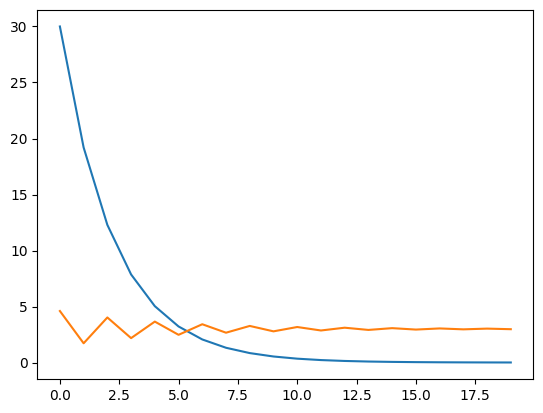

In [314]:
def foward_1D_regression(x):
    return w*x
def loss(y,y_predict):
    return ((y_predict-y)**2).mean()
def gredient(x,y,y_predict):
    return np.dot(2*x,(y_predict-y)).mean()

X= np.array([1,2,3,4],dtype = np.float32)
Y = np.array([3,6,9,12],dtype = np.float32)
X_test = np.array([5],dtype = np.float32)
w = 1

learning_rate =0.03
n_iters = 20

loss_plot = []
w_plot = []
for epoch in range(n_iters):
    y_pred = forward_1D_regression(X)
    
    l = loss(Y,y_pred)
    loss_plot.append(l)
    dw = gredient(X,Y,y_pred)
    
    w -= learning_rate * dw
    w_plot.append(w)
#     if epoch % 1 == 0:
#         print(f'epoch:{epoch+1}: w = {w.item():.3f}, loss = {l:.8f}')
# print(f'predict before training: f(5) = {forward_1D_regression(X_test).item():.3f}')
plt.plot(loss_plot)
plt.plot(w_plot)

### Pytorch Based Regression
In Pytorch, there are super useful module for example, Regression, loss function, optimization, which might be well optimized

Firstlym let consider Linear regression by using <b>torch.nn.Linear</b>, the forward is automatically called in the class

In [349]:
import torch.nn as nn 

class Linear_Regression(nn.Module): 
    def __init__(self,input_dims,output_dims):
        super(Linear_Regression, self).__init__()  
        # remind that nn.Module has its __call__, so we include this line to access "nn.Module"'s attriute including __call__
        self.lin = nn.Linear(input_dims,output_dims)
        
    def forward(self,x):
        return self.lin(x)

# we need 1 feature 4 samples , so that we need column vector input data 4x1, [1,2,3,4] -> (4,), reshape and convert to tensor are needed.
def pytorch_columnize(z):
    return torch.from_numpy(z.reshape(len(z),1))

#### Setting data and data structures

In [351]:

X = pytorch_columnize(np.array([1,2,3,4],dtype = np.float32))
Y = pytorch_columnize(np.array([3,6,9,12],dtype = np.float32))
# in the case that, we define torch.tensor with 4x1 pytorch_columnize is not needed.
X_test = torch.tensor([[5],[6],[7],[8],[9],[10]],dtype = torch.float32)
# inputs and outputs shape is consider as the second component of shape (1 in this case.)
input_dims,output_dims = X_torch.shape[1], Y_torch.shape[1]


In [ ]:
model = Linear_Regression(input_dims,output_dims)
learning_rate = 0.03
n_iters = 150
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

loss_plot = []
w_plot = []
for epoch in range(n_iters):
    y_pred = model(X)
    l = loss(Y,y_pred)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_plot.append(l.detach().numpy())
    [w,b] = model.parameters()
    w_plot.append(w[0][0].item())
#     if epoch % 1 == 0:
#         [w,b] = model.parameters()
#         print(f'epoch:{epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
# print(f'predict before training: f(5) = {model(X_test).item():.3f}')

plt.plot(loss_plot)
plt.plot(w_plot)
plt.ylim([0,8])


In [345]:
model(X_test)

tensor([14.7876], grad_fn=<ViewBackward0>)

In [333]:
w

Parameter containing:
tensor([[1.1051]], requires_grad=True)

Epoch 1: weight = -0.043, bias = 0.322
Epoch 2: weight = 0.385, bias = 0.577
Epoch 3: weight = 0.725, bias = 0.777
Epoch 4: weight = 0.996, bias = 0.935
Epoch 5: weight = 1.213, bias = 1.060
Epoch 6: weight = 1.386, bias = 1.157
Epoch 7: weight = 1.524, bias = 1.233
Epoch 8: weight = 1.634, bias = 1.292
Epoch 9: weight = 1.723, bias = 1.337
Epoch 10: weight = 1.794, bias = 1.372
Epoch 11: weight = 1.851, bias = 1.398
Epoch 12: weight = 1.898, bias = 1.418
Epoch 13: weight = 1.936, bias = 1.432
Epoch 14: weight = 1.966, bias = 1.442
Epoch 15: weight = 1.992, bias = 1.448
Epoch 16: weight = 2.013, bias = 1.452
Epoch 17: weight = 2.030, bias = 1.454
Epoch 18: weight = 2.045, bias = 1.454
Epoch 19: weight = 2.057, bias = 1.453
Epoch 20: weight = 2.068, bias = 1.450
Epoch 21: weight = 2.077, bias = 1.447
Epoch 22: weight = 2.085, bias = 1.443
Epoch 23: weight = 2.093, bias = 1.439
Epoch 24: weight = 2.099, bias = 1.434
Epoch 25: weight = 2.105, bias = 1.429
Epoch 26: weight = 2.111, bias = 

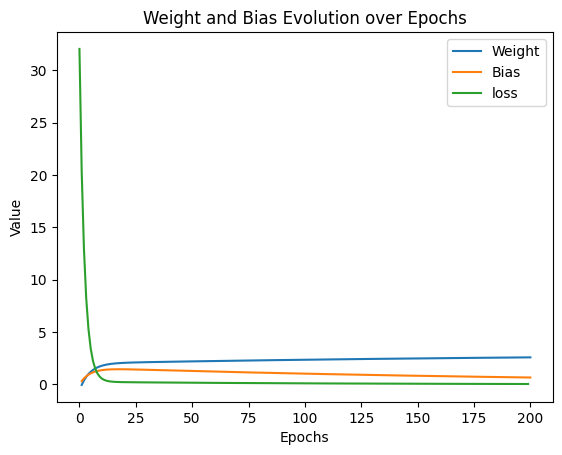

In [348]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to reshape and convert data to tensors
def tf_tensor_columnize(z):
    return tf.convert_to_tensor(z.reshape(len(z), 1))

# Data
X = tf_tensor_columnize(np.array([1, 2, 3, 4], dtype=np.float32))
Y = tf_tensor_columnize(np.array([3, 6, 9, 12], dtype=np.float32))
X_test = tf.constant([5.])

# Define the model
def model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=1))
    return model

linear_model = model()

linear_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.03),
    loss='MeanSquaredError')

# Custom callback to store weights and biases for plotting
class WeightTracker(tf.keras.callbacks.Callback):
    def __init__(self):
        super(WeightTracker, self).__init__()
        self.weights_history = []  # To store weights at each epoch
        self.bias_history = []     # To store biases at each epoch

    def on_epoch_end(self, epoch, logs=None):
        # Get weights from the model (a list of arrays: [weights, bias])
        weights = self.model.get_weights()
        w, b = weights[0][0][0], weights[1][0]
        # Append weights and biases to lists
        self.weights_history.append(w)
        self.bias_history.append(b)
        print(f'Epoch {epoch + 1}: weight = {w:.3f}, bias = {b:.3f}')

weight_tracker = WeightTracker()
history = linear_model.fit(
    X,
    Y,
    epochs=200,
    verbose=0,
    validation_split=0.3,
    callbacks=[weight_tracker]  
)

# Plotting the weight evolution
epochs = range(1, len(weight_tracker.weights_history) + 1)
plt.plot(epochs, weight_tracker.weights_history, label='Weight')
plt.plot(epochs, weight_tracker.bias_history, label='Bias')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Weight and Bias Evolution over Epochs')
plt.legend()
plt.show()


In [342]:
linear_model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[13.557581]], dtype=float32)